In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Create dataset
data = {
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '>40'],
    'Income': ['High', 'Medium', 'Medium', 'Low', 'Medium', 'High'],
    'Buy': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Step 2: Encode
le_age = LabelEncoder()
le_income = LabelEncoder()
le_buy = LabelEncoder()
df['Age'] = le_age.fit_transform(df['Age'])         # <=30=0, 31-40=1, >40=2
df['Income'] = le_income.fit_transform(df['Income']) # High=0, Low=1, Medium=2
df['Buy'] = le_buy.fit_transform(df['Buy'])         # No=0, Yes=1

# Step 3: Features and Target
X = df[['Age', 'Income']]
y = df['Buy']

# Step 4: Train Random Forest
clf = RandomForestClassifier(n_estimators=5, random_state=42)
clf.fit(X, y)

# Step 5: Predict on new data
new_data = [[1, 0]]  # Age='31-40', Income='High'
prediction = clf.predict(new_data)
result = le_buy.inverse_transform(prediction)
print("Random Forest Prediction:", result[0])


Random Forest Prediction: No


c:\Users\osour\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [4]:
import numpy as np

# Print feature importance
importances = clf.feature_importances_
feature_names = ['Age', 'Income']

for name, score in zip(feature_names, importances):
    print(f"{name}: {score:.2f}")


Age: 0.55
Income: 0.45


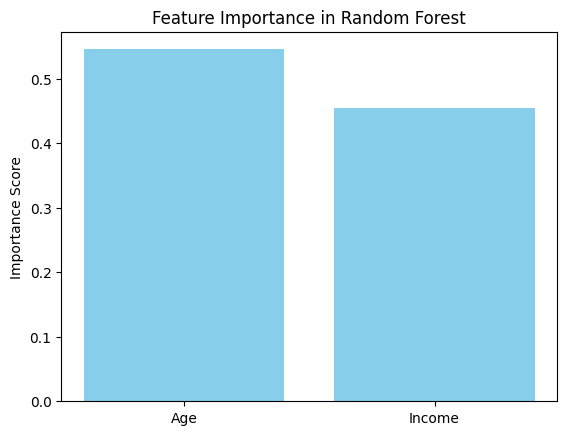

: 

In [ ]:
import matplotlib.pyplot as plt

plt.bar(feature_names, importances, color='skyblue')
plt.title("Feature Importance in Random Forest")
plt.ylabel("Importance Score")
plt.show()
